In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
directory = r'D:\Folio Leaf Dataset\Folio Leaf Dataset\Folio'

In [3]:
categories = ['betel','bitter orange','chinese guava','eggplant']

In [4]:
data = []
for category in categories:
    image_set = os.path.join(directory,category)
    labels = categories.index(category)
    for image in os.listdir(image_set):
        image_path = os.path.join(image_set,image)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array,(100,100))
        data.append([image_array,labels])

In [5]:
import random 
random.shuffle(data)
x = []
y = []
for features,labels in data:
    x.append(features)
    y.append(labels)

In [6]:
x = np.array(x)
y = np.array(y)
x = x/255
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [7]:
import keras
import tensorflow as tf
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential

In [8]:
print("Shape of x_train is ",x_train.shape)
print("Shape of y_train is ",y_train.shape)
print("Shape of x_test is ",x_test.shape)
print("Shape of y_test is ",y_test.shape)

Shape of x_train is  (62, 100, 100, 3)
Shape of y_train is  (62,)
Shape of x_test is  (16, 100, 100, 3)
Shape of y_test is  (16,)


In [9]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(100,100,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 64)                1

In [11]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [12]:
model_history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
2/2 [==============================] - 1s 587ms/step - loss: 1.6825 - accuracy: 0.1452 - val_loss: 1.3565 - val_accuracy: 0.1875
Epoch 2/20
2/2 [==============================] - 1s 324ms/step - loss: 1.3194 - accuracy: 0.2742 - val_loss: 1.3012 - val_accuracy: 0.4375
Epoch 3/20
2/2 [==============================] - 1s 312ms/step - loss: 1.2702 - accuracy: 0.5968 - val_loss: 1.2390 - val_accuracy: 0.6875
Epoch 4/20
2/2 [==============================] - 1s 326ms/step - loss: 1.1936 - accuracy: 0.6290 - val_loss: 1.1752 - val_accuracy: 0.5625
Epoch 5/20
2/2 [==============================] - 1s 333ms/step - loss: 1.0359 - accuracy: 0.6613 - val_loss: 1.0271 - val_accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 1s 315ms/step - loss: 0.8822 - accuracy: 0.6613 - val_loss: 0.8018 - val_accuracy: 0.7500
Epoch 7/20
2/2 [==============================] - 1s 303ms/step - loss: 0.6841 - accuracy: 0.9032 - val_loss: 0.6409 - val_accuracy: 0.8125
Epoch 8/20
2/2 [====

Text(0, 0.5, 'Loss')

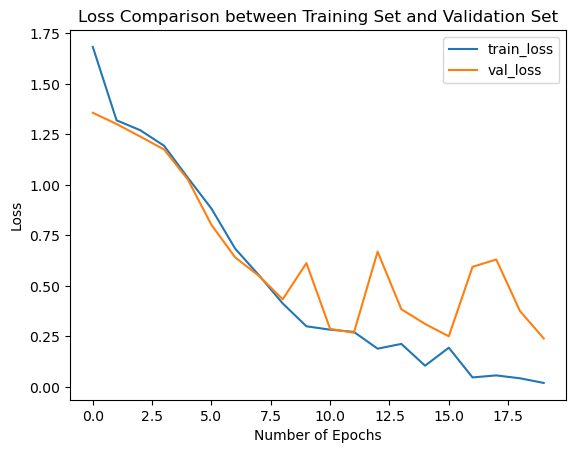

In [15]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Comparison between Training Set and Validation Set')
plt.legend(['train_loss','val_loss'],loc='upper right')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

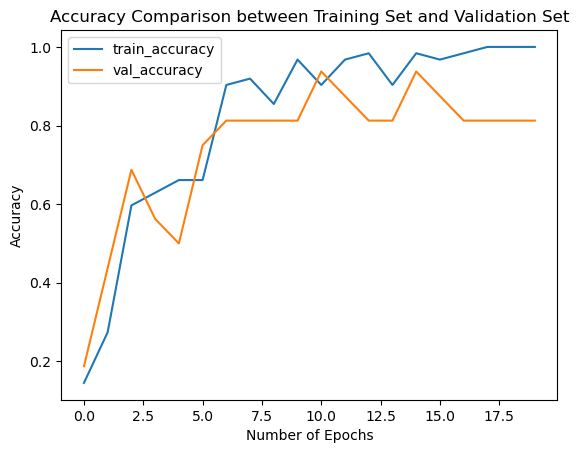

In [17]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy Comparison between Training Set and Validation Set')
plt.legend(['train_accuracy','val_accuracy'],loc='upper left')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')